---
### Import Libraries

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("parkinsons_Istanbul_data.csv")

### Exploratory Data Analysis

In [2]:
df.head()

,status,DFA,RPDE,MDVP:RAP,MDVP:Shimmer,NHR,HNR
0,1,0.71826,0.57227,0.00067,0.05883,0.036223,18.995
1,1,0.69481,0.53966,0.00052,0.05516,0.017974,21.497
2,1,0.67604,0.58982,0.00057,0.09902,0.026313,17.651
3,1,0.79672,0.59257,0.00149,0.05451,0.042003,19.865
4,1,0.79782,0.53028,0.00166,0.05610,0.027139,19.557


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        756 non-null    int64  
 1   DFA           756 non-null    float64
 2   RPDE          756 non-null    float64
 3   MDVP:RAP      756 non-null    float64
 4   MDVP:Shimmer  756 non-null    float64
 5   NHR           756 non-null    float64
 6   HNR           756 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 41.5 KB


In [4]:
df.describe()

,status,DFA,RPDE,MDVP:RAP,MDVP:Shimmer,NHR,HNR
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.746032,0.700414,0.489058,0.000605,0.067473,0.051131,18.859632
std,0.435568,0.069718,0.137442,0.000981,0.042969,0.104579,5.576473
min,0.000000,0.543500,0.154300,0.000020,0.006560,0.000618,1.655000
25%,0.000000,0.647053,0.386537,0.000150,0.036097,0.007168,15.713250
50%,1.000000,0.700525,0.484355,0.000280,0.055730,0.016273,19.309500
75%,1.000000,0.754985,0.586515,0.000650,0.085547,0.040060,22.877750
max,1.000000,0.852640,0.871230,0.011050,0.251010,0.761696,33.197000


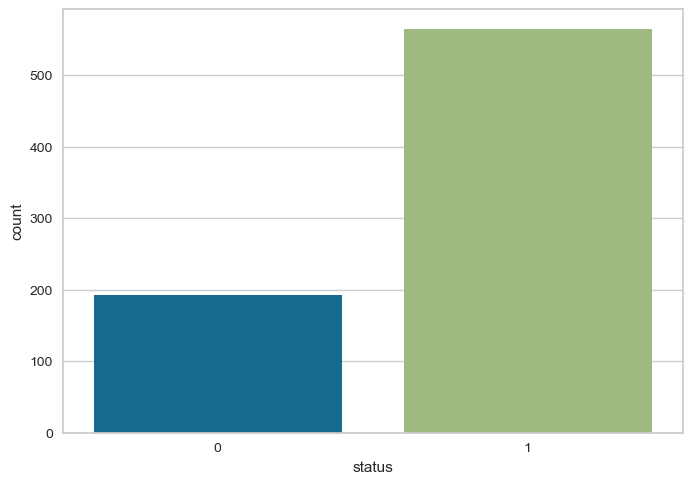

In [5]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

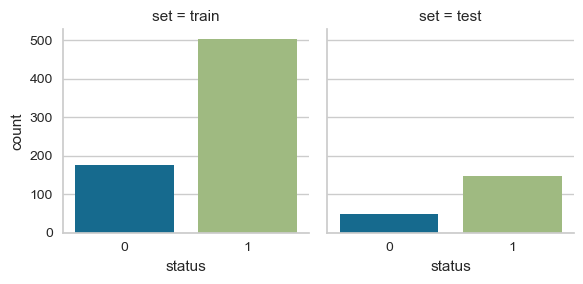

Training dataset           : 680
Unseen data for validation : 195


In [6]:
test_df = pd.read_csv("parkinsons_UK_data.csv")
train_df = df.sample(frac=0.9).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [7]:
clf1 = setup(data = train_df, target = 'status', fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(680, 8)"
4,Transformed data shape,"(877, 8)"
5,Transformed train set shape,"(672, 8)"
6,Transformed test set shape,"(205, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


### Model selection

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7411,0.6913,0.8390,0.8199,0.8276,0.3021,0.3085,0.6880
lightgbm,Light Gradient Boosting Machine,0.7116,0.6964,0.7910,0.8157,0.8015,0.2672,0.2701,0.6480
rf,Random Forest Classifier,0.7096,0.6848,0.7885,0.8141,0.7998,0.2676,0.2696,0.7510
gbc,Gradient Boosting Classifier,0.6884,0.6966,0.7406,0.8261,0.7788,0.2521,0.2598,0.5670
svm,SVM - Linear Kernel,0.6796,0.0000,0.8300,0.7961,0.7574,0.0508,0.0716,0.3270
lda,Linear Discriminant Analysis,0.6614,0.7115,0.6648,0.8472,0.7412,0.2700,0.2867,0.4220
ada,Ada Boost Classifier,0.6421,0.6263,0.6723,0.8161,0.7341,0.1961,0.2069,0.5030
dt,Decision Tree Classifier,0.6399,0.5739,0.7087,0.7861,0.7436,0.1364,0.1397,0.3600
ridge,Ridge Classifier,0.6317,0.0000,0.6505,0.8196,0.7203,0.1962,0.2094,0.3410
lr,Logistic Regression,0.6254,0.6675,0.6363,0.8227,0.7135,0.1929,0.2084,1.2160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [8]:
extraTreesClassifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7708,0.7836,0.8333,0.8571,0.8451,0.4054,0.4060
1,0.7917,0.8657,0.7778,0.9333,0.8485,0.5238,0.5466
2,0.6667,0.5880,0.8056,0.7632,0.7838,0.0588,0.0592
3,0.7500,0.7350,0.8333,0.8333,0.8333,0.3333,0.3333
4,0.7917,0.7431,0.8889,0.8421,0.8649,0.4118,0.4146
5,0.8085,0.8583,0.8857,0.8611,0.8732,0.4823,0.4831
6,0.7447,0.7893,0.8571,0.8108,0.8333,0.2897,0.2917
7,0.7447,0.7821,0.7714,0.8710,0.8182,0.3948,0.4031
8,0.7447,0.7405,0.7714,0.8710,0.8182,0.3948,0.4031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuned Model

In [9]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8171,0.6389,0.8846,0.7419,0.3043,0.3380
1,0.7500,0.8148,0.7778,0.8750,0.8235,0.4000,0.4082
2,0.6250,0.5926,0.6944,0.7812,0.7353,0.1000,0.1021
3,0.7083,0.7616,0.7222,0.8667,0.7879,0.3333,0.3478
4,0.6042,0.7431,0.5556,0.8696,0.6780,0.2245,0.2648
5,0.7447,0.8071,0.7714,0.8710,0.8182,0.3948,0.4031
6,0.7234,0.7452,0.7429,0.8667,0.8000,0.3602,0.3716
7,0.6383,0.6643,0.6857,0.8000,0.7385,0.1634,0.1685
8,0.6170,0.7095,0.6000,0.8400,0.7000,0.2093,0.2330


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

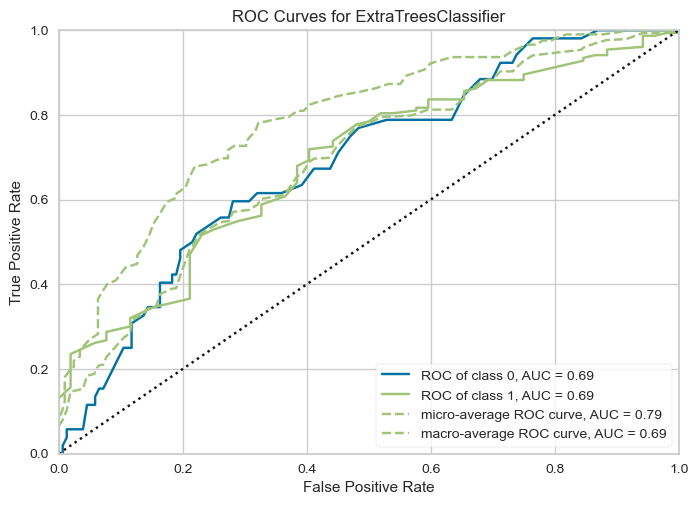

In [10]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

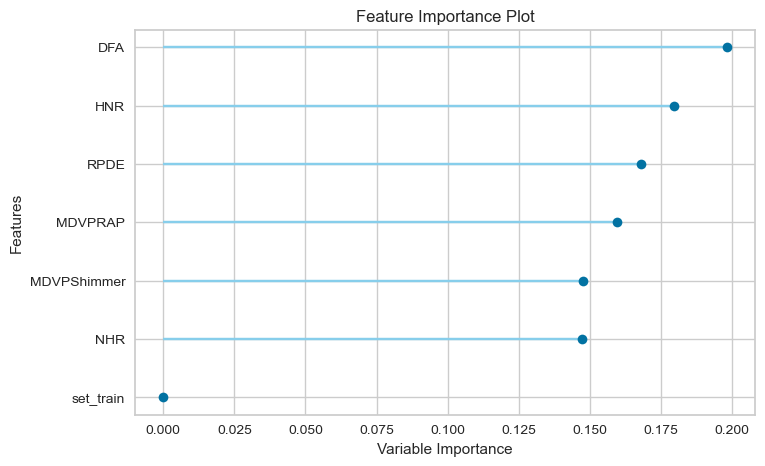

In [11]:
plot_model(tuned_extraTreesClassifier, plot='feature')

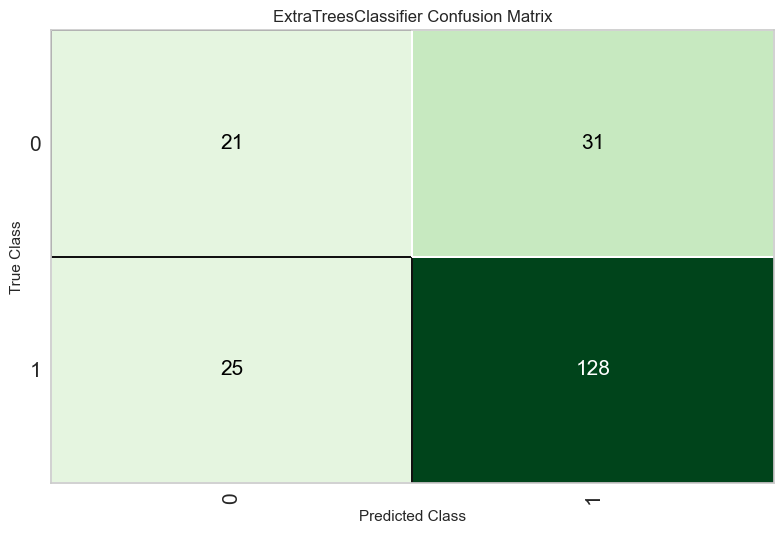

In [12]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [7]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

NameError: name 'tuned_extraTreesClassifier' is not defined

In [ ]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


